# Final Project Heart Attack Prediction

In [29]:
#importing dataset
import pandas as pd
df=pd.read_csv("heart_new.csv")

In [30]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [31]:
df.shape

(401958, 279)

# Importing Libraries

In [32]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 


# Data Prepararation

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)

In [34]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA',
       '_VIRCOLN', '_SBONTIM', '_CRCREC1', '_AIDTST4'],
      dtype='object', length=279)

In [35]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 279 columns):
 #    Column    Dtype  
---   ------    -----  
 0    _STATE    int64  
 1    FMONTH    int64  
 2    IDATE     int64  
 3    IMONTH    int64  
 4    IDAY      int64  
 5    IYEAR     int64  
 6    DISPCODE  int64  
 7    SEQNO     int64  
 8    _PSU      int64  
 9    CTELENM1  float64
 10   PVTRESD1  float64
 11   COLGHOUS  float64
 12   STATERE1  float64
 13   CELPHONE  float64
 14   LADULT1   float64
 15   COLGSEX   float64
 16   NUMADULT  float64
 17   LANDSEX   float64
 18   NUMMEN    float64
 19   NUMWOMEN  float64
 20   RESPSLCT  float64
 21   SAFETIME  float64
 22   CTELNUM1  float64
 23   CELLFON5  float64
 24   CADULT1   float64
 25   CELLSEX   float64
 26   PVTRESD3  float64
 27   CCLGHOUS  float64
 28   CSTATE1   float64
 29   LANDLINE  float64
 30   HHADULT   float64
 31   SEXVAR    int64  
 32   GENHLTH   float64
 33   PHYSHLTH  float64
 34   MENTHLTH  float64


In [36]:
df.isnull().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
DISPCODE         0
SEQNO            0
_PSU             0
CTELENM1    277207
PVTRESD1    277207
COLGHOUS    401935
STATERE1    277207
CELPHONE    277207
LADULT1     277207
COLGSEX     401935
NUMADULT    277216
LANDSEX     350509
NUMMEN      291536
NUMWOMEN    291536
RESPSLCT    354532
SAFETIME    124751
CTELNUM1    124751
CELLFON5    124751
CADULT1     124755
CELLSEX     124771
PVTRESD3    124752
CCLGHOUS    400979
CSTATE1     124758
LANDLINE    124752
HHADULT     124753
SEXVAR           0
GENHLTH          8
PHYSHLTH         5
MENTHLTH         5
POORHLTH    200343
HLTHPLN1         3
PERSDOC2         3
MEDCOST          3
CHECKUP1         5
EXERANY2         3
SLEPTIM1         3
CVDINFR4         6
CVDCRHD4         3
CVDSTRK3         3
ASTHMA3          3
ASTHNOW     347817
CHCSCNCR         3
CHCOCNCR         3
CHCCOPD2         5
HAVARTH4         5
ADDEPEV3         6
CHCKDNY2    

In [37]:
#finnding null values
list1=[]
list=df.columns
for i in list:
    j=round(100*(df[i].isnull().sum()/len(df[i])),2)
    if j < 60.00:
        list1.append(i)
print(len(list1))
# we have 155 columns with less than 60% of value

155


In [38]:
new_df=df[list1]

In [39]:
new_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,SEATBELT,DRNKDRI2,HADMAM,HADPAP2,LASTPAP2,HPVTEST,HADHYST2,COLNSCPY,COLNTEST,SIGMSCPY,BLDSTOL1,STOOLDNA,VIRCOLON,HIVTST7,HIVRISK5,PDIABTST,PREDIAB1,ECIGARET,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,2.0,4.0,88.0,1.0,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,1.0,NaN,1.0,1.0,4.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,1.0,NaN,10,1,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,1,1,9,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,6.0,1.0,1.0,2.0,7.0,88.0,99.0,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,10,1,1.0,1.0,11011,69.640207,1.0,69.640207,2,NaN,1,0.465411,460.002849,171.283329,1,1,1,9,1,2.0,2,1,2,1.0,2,1,2.0,2.0,2,2.0,2.0,2.0,2.0,2,10,2,65,6,64.0,163.0,7711.0,2918.0,3.0,2,1,4,9,9,9,9,900,9,99900,9,9,9,9,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,7.0,1.0,5.0,1.0,1.0,2.0,7.0,88.0,7.0,7777.0,508.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,888.0,NaN,NaN,NaN,1.0,102019.0,2.0,2.0,88.0,1.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,10,1,1.0,1.0,11012,279.748901,1.0,279.748901,2,NaN,1,0.465411,1847.859106,1334.368863,1,1,1,9,1,2.0,1,1,3,1.0,9,1,2.0,2.0,2,2.0,2.0,2.0,2.0,2,10,2,65,6,68.0,173.0,NaN,NaN,NaN,9,1,3,5,4,1,2,0,1,0,1,1,1,9,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,88.0,88.0,NaN,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,1.0,3.0,4.0,1.0,9.0,2.0,5.0,88.0,99.0,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,1.0,NaN,2.0,1.0,7.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,10,1,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,9,NaN,1472.417322,1297.486618,1,1,1,9,2,2.0,1,1,3,2.0,2,9,1.0,1.0,2,1.0,1.0,1.0,1.0,2,13,2,80,6,NaN,NaN,NaN,NaN,NaN,9,1,2,9,4,1,2,0,1,0,1,1,1,9,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,8.0,3.0,6.0,2.0,8.0,2.0,7.0,88.0,77.0,126.0,506.

In [40]:
#percent of null values in new df
round(100*(new_df.isnull().sum()/len(new_df)),2)

_STATE       0.00
FMONTH       0.00
IDATE        0.00
IMONTH       0.00
IDAY         0.00
IYEAR        0.00
DISPCODE     0.00
SEQNO        0.00
_PSU         0.00
SAFETIME    31.04
CTELNUM1    31.04
CELLFON5    31.04
CADULT1     31.04
CELLSEX     31.04
PVTRESD3    31.04
CSTATE1     31.04
LANDLINE    31.04
HHADULT     31.04
SEXVAR       0.00
GENHLTH      0.00
PHYSHLTH     0.00
MENTHLTH     0.00
POORHLTH    49.84
HLTHPLN1     0.00
PERSDOC2     0.00
MEDCOST      0.00
CHECKUP1     0.00
EXERANY2     0.00
SLEPTIM1     0.00
CVDINFR4     0.00
CVDCRHD4     0.00
CVDSTRK3     0.00
ASTHMA3      0.00
CHCSCNCR     0.00
CHCOCNCR     0.00
CHCCOPD2     0.00
HAVARTH4     0.00
ADDEPEV3     0.00
CHCKDNY2     0.00
DIABETE4     0.00
LASTDEN4     0.00
RMVTETH4     0.00
MARITAL      0.00
EDUCA        0.00
RENTHOM1     0.00
CPDEMO1B     0.03
VETERAN3     0.33
EMPLOY1      0.73
CHILDREN     1.19
INCOME2      1.83
WEIGHT2      2.45
HEIGHT3      2.69
DEAF         3.09
BLIND        3.31
DECIDE       3.57
DIFFWALK  

In [41]:
#selecting columns based on metadata which are related to heart problem and also Above observation of Null values
new2_df = new_df[['_MICHD','_BMI5CAT','_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'_AGE_G','_IMPRACE','EXERANY2','GENHLTH','ADDEPEV3','SLEPTIM1','ASTHMA3','_MENT14D',
             'CHCKDNY2','CHCSCNCR','_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
new2_df.head()

,_MICHD,_BMI5CAT,_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,_AGE_G,_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,_MENT14D,CHCKDNY2,CHCSCNCR,_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,2.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,2.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,2.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,2.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [42]:
new2_df.shape

(401958, 21)

# analysing categorical variable and replacing null values


In [43]:
# _MICHD represent having coronary heart disease or myocardial infarction
new2_df['_MICHD'].unique()

array([ 2.,  1., nan])

In [44]:
#cheacking Target column
#here 2 means no and 1 means yes
#replace it 0 and 1
new2_df['_MICHD']=new2_df['_MICHD'].replace({2:0,1:1})
new2_df['_MICHD'].unique()

array([ 0.,  1., nan])

In [45]:
#converiting column into series
columns_list=pd.Series(new2_df.columns)
columns_list

0       _MICHD
1     _BMI5CAT
2     _SMOKER3
3     CVDSTRK3
4       SEXVAR
5     CVDINFR4
6       _AGE_G
7     _IMPRACE
8     EXERANY2
9      GENHLTH
10    ADDEPEV3
11    SLEPTIM1
12     ASTHMA3
13    _MENT14D
14    CHCKDNY2
15    CHCSCNCR
16    _PHYS14D
17    CHCOCNCR
18    CHCCOPD2
19     MARITAL
20    DIFFWALK
dtype: object

In [46]:
# define an function to cheack unique values in all columns

def check_unique(l):
  for i in l:
    print("unnique values in  ",i,"is ", new2_df[i].unique())
check_unique(columns_list)

unnique values in   _MICHD is  [ 0.  1. nan]
unnique values in   _BMI5CAT is  [ 1.  3. nan  2.  4.]
unnique values in   _SMOKER3 is  [1 9 4 3 2]
unnique values in   CVDSTRK3 is  [ 2.  1.  7.  9. nan]
unnique values in   SEXVAR is  [2 1]
unnique values in   CVDINFR4 is  [ 2.  7.  1.  9. nan]
unnique values in   _AGE_G is  [5 6 3 4 1 2]
unnique values in   _IMPRACE is  [1 2 3 4 6 5]
unnique values in   EXERANY2 is  [ 1.  2.  7. nan  9.]
unnique values in   GENHLTH is  [ 2.  3.  1.  4.  5.  7.  9. nan]
unnique values in   ADDEPEV3 is  [ 1.  2.  9. nan  7.]
unnique values in   SLEPTIM1 is  [ 5.  7.  6.  8. 12.  4.  9. 10. 15.  1. 77. 99.  3.  2. 16. 11. 18. 14.
 13. nan 20. 24. 17. 19. 21. 22. 23.]
unnique values in   ASTHMA3 is  [ 1.  2.  7.  9. nan]
unnique values in   _MENT14D is  [3 1 2 9]
unnique values in   CHCKDNY2 is  [ 2.  1.  7. nan  9.]
unnique values in   CHCSCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   _PHYS14D is  [2 1 3 9]
unnique values in   CHCOCNCR is  [ 1.  2.  7. 

In [47]:
#in columns we have categorical data so to replace all null values with mode
# for categorical data it is better to replace null valuues with most frequently occuring element
def replace_null(l):
  for i in l:
    new2_df[i]=new2_df[i].replace(np.nan,new2_df[i].mode()[0])

replace_null(columns_list)

In [48]:
new2_df.isna().sum()

_MICHD      0
_BMI5CAT    0
_SMOKER3    0
CVDSTRK3    0
SEXVAR      0
CVDINFR4    0
_AGE_G      0
_IMPRACE    0
EXERANY2    0
GENHLTH     0
ADDEPEV3    0
SLEPTIM1    0
ASTHMA3     0
_MENT14D    0
CHCKDNY2    0
CHCSCNCR    0
_PHYS14D    0
CHCOCNCR    0
CHCCOPD2    0
MARITAL     0
DIFFWALK    0
dtype: int64

In [49]:
new2_df.shape

(401958, 21)

In [50]:
X=new2_df.drop('_MICHD',axis=1)
X

,_BMI5CAT,_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,_AGE_G,_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,_MENT14D,CHCKDNY2,CHCSCNCR,_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,2.0,4,2.0,2,2.0,4,5,1.0,3.0,1.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,2.0,2.0
401954,4.0,4,2.0,2,2.0,2,5,2.0,3.0,2.0,12.0,2.0,1,2.0,2.0,1,2.0,2.0,1.0,2.0
401955,4.0,4,2.0,2,2.0,6,5,1.0,3.0,2.0,8.0,2.0,1,2.0,2.0,1,2.0,2.0,1.0,2.0
401956,3.0,9,2.0,1,2.0,5,5,1.0,3.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,1.0,2.0


In [51]:
new2_df.columns

Index(['_MICHD', '_BMI5CAT', '_SMOKER3', 'CVDSTRK3', 'SEXVAR', 'CVDINFR4',
       '_AGE_G', '_IMPRACE', 'EXERANY2', 'GENHLTH', 'ADDEPEV3', 'SLEPTIM1',
       'ASTHMA3', '_MENT14D', 'CHCKDNY2', 'CHCSCNCR', '_PHYS14D', 'CHCOCNCR',
       'CHCCOPD2', 'MARITAL', 'DIFFWALK'],
      dtype='object')

In [52]:
new2_df


,_MICHD,_BMI5CAT,_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,_AGE_G,_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,_MENT14D,CHCKDNY2,CHCSCNCR,_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,0.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,0.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,0.0,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,0.0,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,0.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,0.0,2.0,4,2.0,2,2.0,4,5,1.0,3.0,1.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,2.0,2.0
401954,0.0,4.0,4,2.0,2,2.0,2,5,2.0,3.0,2.0,12.0,2.0,1,2.0,2.0,1,2.0,2.0,1.0,2.0
401955,0.0,4.0,4,2.0,2,2.0,6,5,1.0,3.0,2.0,8.0,2.0,1,2.0,2.0,1,2.0,2.0,1.0,2.0
401956,0.0,3.0,9,2.0,1,2.0,5,5,1.0,3.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,1.0,2.0


In [53]:
new2_df['_MICHD'].value_counts()

0.0    367795
1.0     34163
Name: _MICHD, dtype: int64

In [54]:
#It represent correlation between differnt columns 
new2_df.corr()

,_MICHD,_BMI5CAT,_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,_AGE_G,_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,_MENT14D,CHCKDNY2,CHCSCNCR,_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
_MICHD,1.000000,0.049549,-0.050744,-0.091553,-0.068824,-0.386751,0.209564,-0.035244,0.085397,0.234121,-0.029361,0.020932,-0.031996,0.016180,-0.054730,-0.063005,0.107203,-0.058540,-0.090333,-0.041095,-0.130386
_BMI5CAT,0.049549,1.000000,0.003111,-0.008204,-0.068188,-0.016040,0.042929,0.024690,0.091934,0.172566,-0.045139,-0.007557,-0.044086,0.006612,-0.015908,0.012810,0.039303,-0.000615,-0.014246,-0.055039,-0.084735
_SMOKER3,-0.050744,0.003111,1.000000,0.035654,0.035102,0.043277,-0.032494,0.034767,-0.043172,-0.102953,0.086945,0.023553,0.035595,-0.033517,0.024258,0.018194,-0.032561,0.028301,0.089245,-0.000294,0.110286
CVDSTRK3,-0.091553,-0.008204,0.035654,1.000000,-0.005287,0.255393,-0.055314,0.008144,-0.002525,-0.055428,0.167485,0.026995,0.213228,0.004326,0.242759,0.228644,-0.015907,0.227243,0.218770,0.022395,0.094089
SEXVAR,-0.068824,-0.068188,0.035102,-0.005287,1.000000,0.024955,0.064796,-0.004435,0.041426,0.024855,-0.087243,0.015764,-0.053074,0.071055,-0.004889,0.001671,0.036278,-0.028970,-0.022560,-0.002451,-0.044307
CVDINFR4,-0.386751,-0.016040,0.043277,0.255393,0.024955,1.000000,-0.068274,0.022647,0.004350,-0.055435,0.124561,0.037046,0.152658,0.023341,0.180464,0.180499,-0.004408,0.174889,0.179382,0.035157,0.075582
_AGE_G,0.209564,0.042929,-0.032494,-0.055314,0.064796,-0.068274,1.000000,-0.205222,0.096785,0.183111,0.041787,0.045514,0.037041,-0.094849,-0.037065,-0.144230,0.076852,-0.136699,-0.074151,-0.342143,-0.141694
_IMPRACE,-0.035244,0.024690,0.034767,0.008144,-0.004435,0.022647,-0.205222,1.000000,0.050164,0.049397,0.011743,0.009208,-0.015311,0.019475,0.006081,0.071496,0.014143,0.042007,0.021435,0.132379,-0.005302
EXERANY2,0.085397,0.091934,-0.043172,-0.002525,0.041426,0.004350,0.096785,0.050164,1.000000,0.250714,-0.019460,0.077310,-0.001800,0.065502,0.008556,0.025348,0.151122,-0.000063,-0.038825,0.032130,-0.135494
GENHLTH,0.234121,0.172566,-0.102953,-0.055428,0.024855,-0.055435,0.183111,0.049397,0.250714,1.000000,-0.117906,0.064434,-0.078705,0.166632,-0.043745,-0.019010,0.329480,-0.072358,-0.118625,0.035092,-0.254503


<AxesSubplot:>

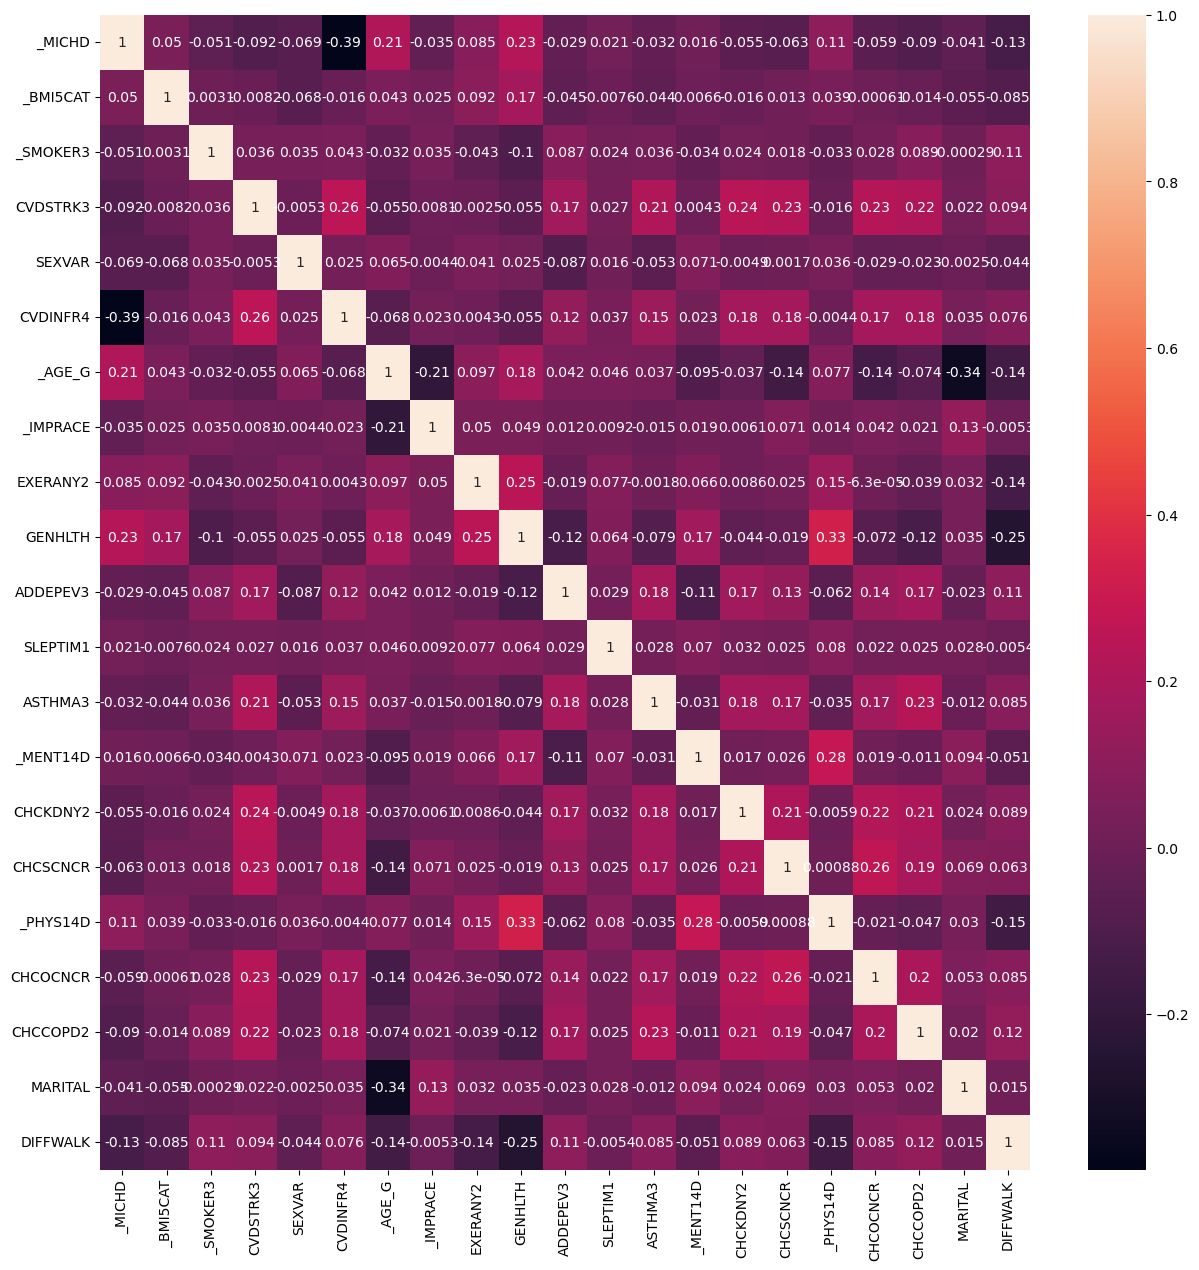

In [55]:
# NOW LETS START WITH EDA
corr=new2_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)


Text(0, 0.5, 'Count')

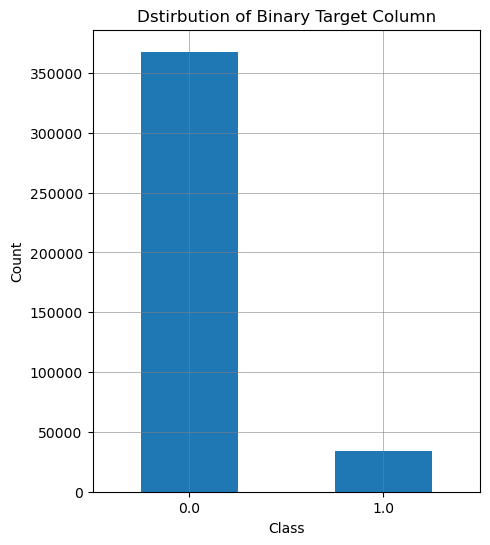

In [56]:
#plotting bar graph
new2_df['_MICHD'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Dstirbution of Binary Target Column")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Class")
plt.ylabel("Count")

In [57]:
#now lets try to analyse binary variable
binary_variable=[i for i in new2_df.columns if(len(new2_df[i].unique())==2)]
binary_variable

['_MICHD', 'SEXVAR']

In [58]:
#ordinal variable 
ordinal_variables= [i for i in new2_df.columns if ((len(new2_df[i].unique()) > 2 ) and (len(new2_df[i].unique()) <= 6))]
ordinal_variables

['_BMI5CAT',
 '_SMOKER3',
 'CVDSTRK3',
 'CVDINFR4',
 '_AGE_G',
 '_IMPRACE',
 'EXERANY2',
 'ADDEPEV3',
 'ASTHMA3',
 '_MENT14D',
 'CHCKDNY2',
 'CHCSCNCR',
 '_PHYS14D',
 'CHCOCNCR',
 'CHCCOPD2',
 'DIFFWALK']

Text(0, 0.5, 'Count')

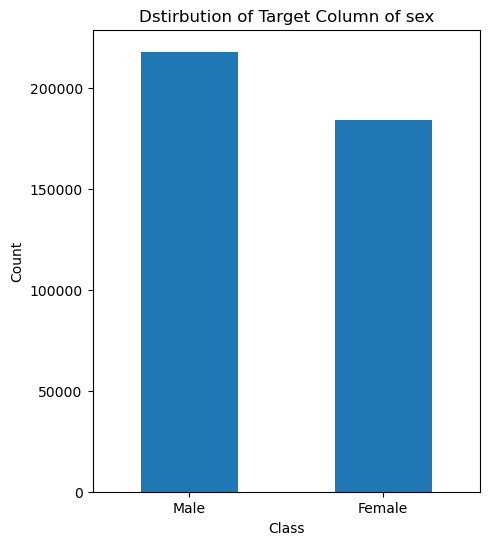

In [59]:
new2_df['SEXVAR'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Dstirbution of Target Column of sex")
plt.xticks(range(2), ['Male','Female'])
plt.xlabel("Class")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

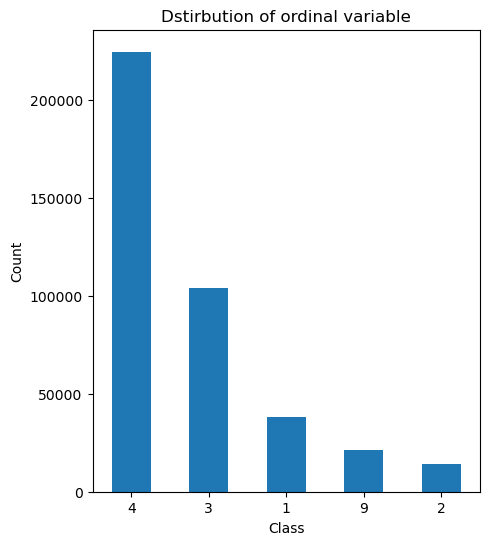

In [60]:
#smoker 
new2_df['_SMOKER3'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Dstirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")
#1=Current smoker--smokes every day
#2=Current smoker--now smokes some days
#3=Former smoker 
#4 value belong to non smoker or neaver smoke



Text(0, 0.5, 'Count')

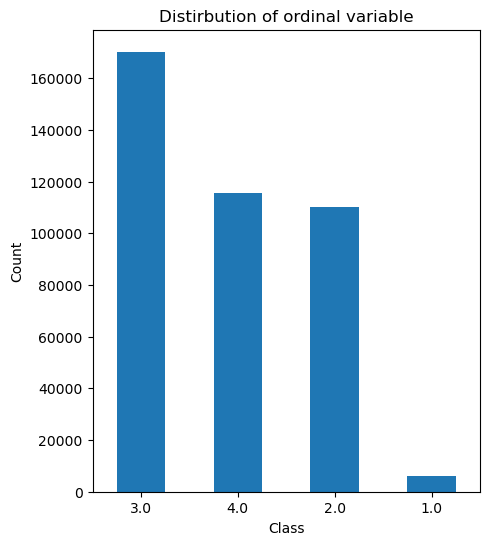

In [61]:
#plot on Body mass index
new2_df['_BMI5CAT'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")
#1--Underweight
#2--Normal Weight
#3-- belong to an overweight category
#4--obese

Text(0, 0.5, 'Count')

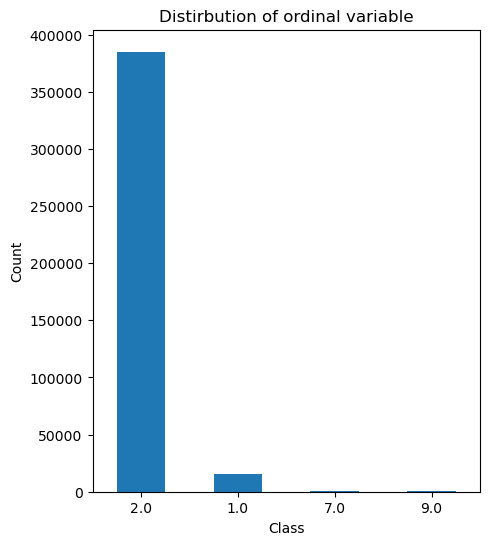

In [62]:
#CVDSTRK3 --ever told you had a stroke
new2_df['CVDSTRK3'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")
#CVDSTRK3 this column belong to ever dignosed with stroke 2 belong to no
#1--yes
#2--no
#7--Don't know or not sure
#9--refused 

Text(0, 0.5, 'Count')

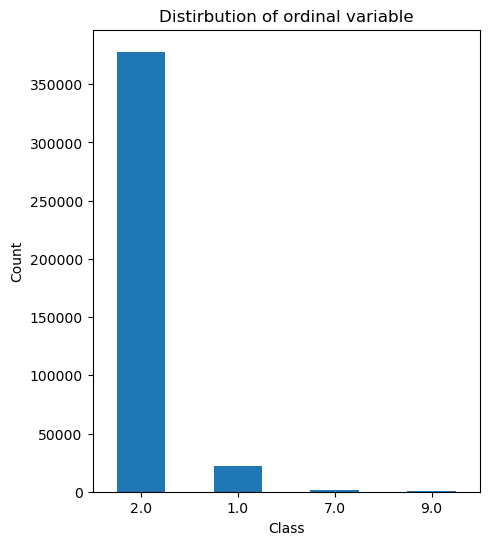

In [63]:
#Ever Diagnosed with Heart Attack
new2_df['CVDINFR4'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#COLUMN RELATED TO EVER DIGNOSED WITH HEART ATTACK 2 represent no

Text(0, 0.5, 'Count')

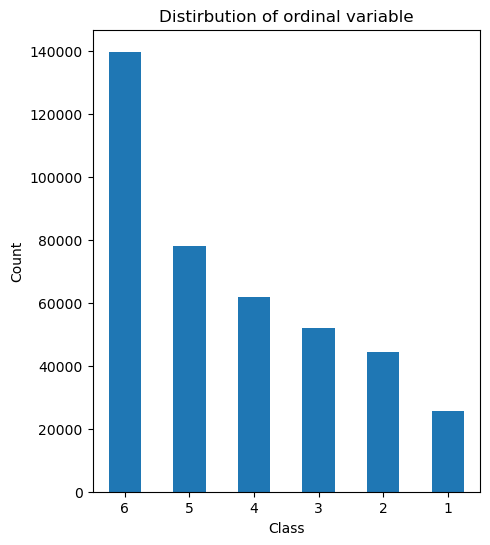

In [64]:
#IMPUTED AGE IN 6 GROUPS
new2_df['_AGE_G'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

# in our dataset maximum values are related to age group more than 65 or older

Text(0, 0.5, 'Count')

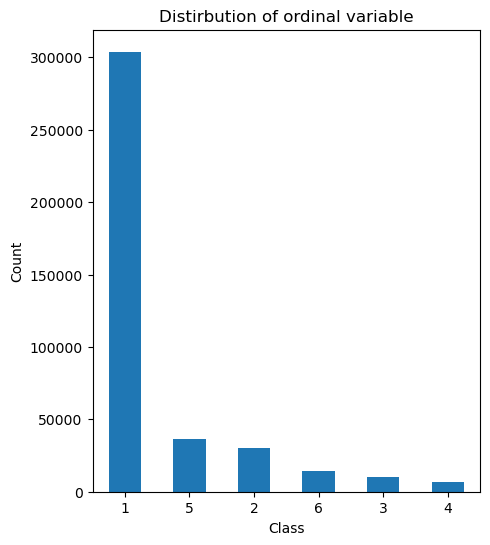

In [65]:
#IMPUTED race or ethnicity
new2_df['_IMPRACE'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#imputed race and ethnicity value maximum people in dataset are white or non hispanic
#1--white
#2--black
#3--Asian
#4--American
#5--Hispanic
#6--other race

Text(0, 0.5, 'Count')

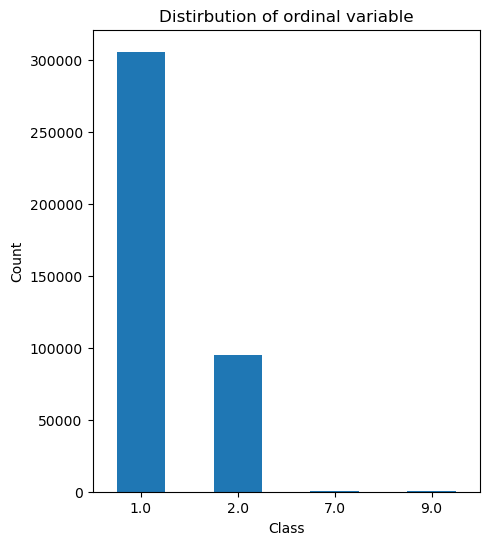

In [66]:
#Exercise in past 30 days
new2_df['EXERANY2'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")
#excercise in past 30 days 1 represent yes
#2 -- represent no
#3 -- represent dont know or not sure
#4 -- represent refused

Text(0, 0.5, 'Count')

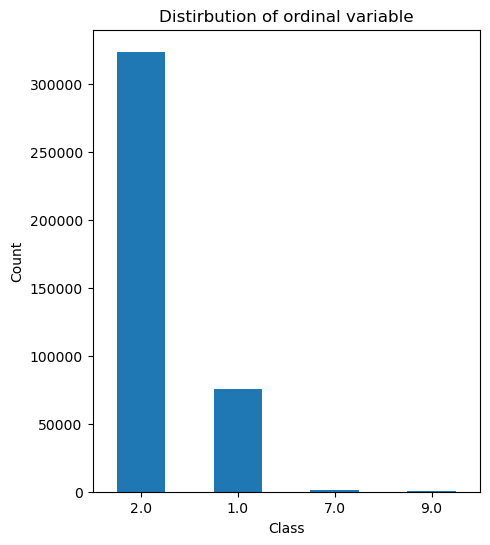

In [67]:
#you had a depressive disorder
new2_df['ADDEPEV3'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#ADDEPEV3 YOU HAD ANY DEPRESSIVE DISORDER 2 REPRESENT NO

Text(0, 0.5, 'Count')

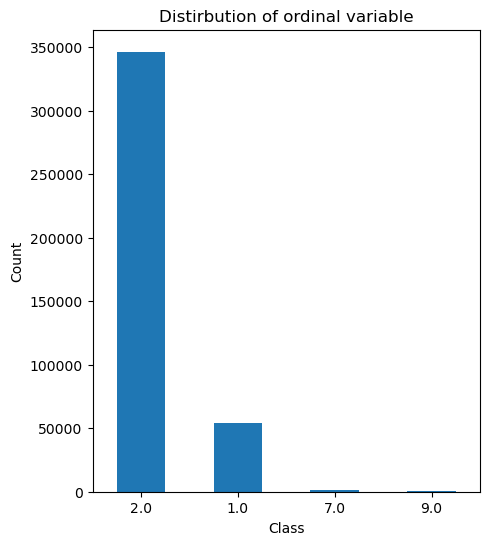

In [68]:
#ever Told Had Asthma
new2_df['ASTHMA3'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

# ever you had asthama 2 represent no

Text(0, 0.5, 'Count')

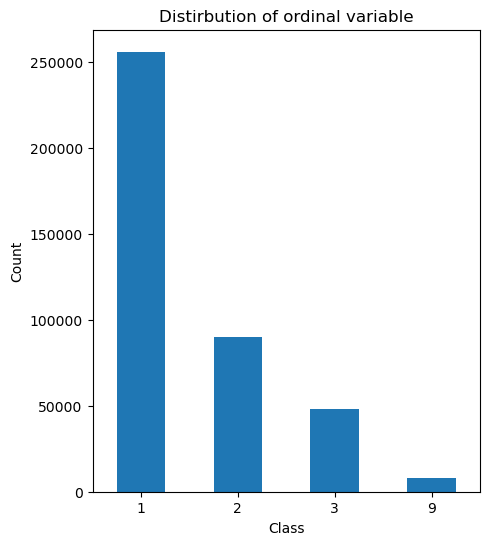

In [69]:
#computed Mental Health Status
new2_df['_MENT14D'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#computed mental health status
#1 -- Zero days when mental health not good 
#2 -- 1-13 days when mental health not good
#3 -- 14+ days when mental health not good
#4 -- Don’t know/Refused/Missing

Text(0, 0.5, 'Count')

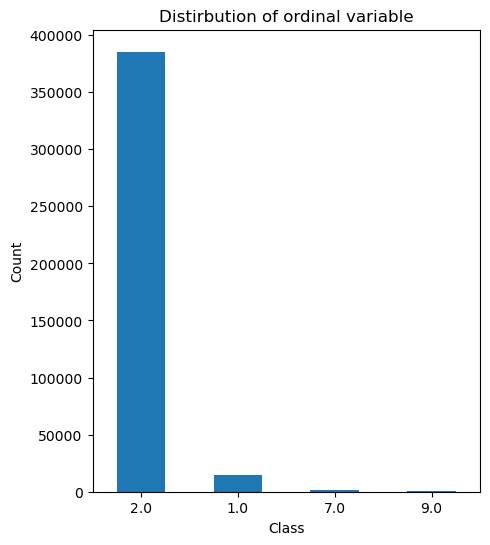

In [70]:
#Ever told you have kidney disease?
new2_df['CHCKDNY2'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#ever told you had kidney diseas 2 represent no

Text(0, 0.5, 'Count')

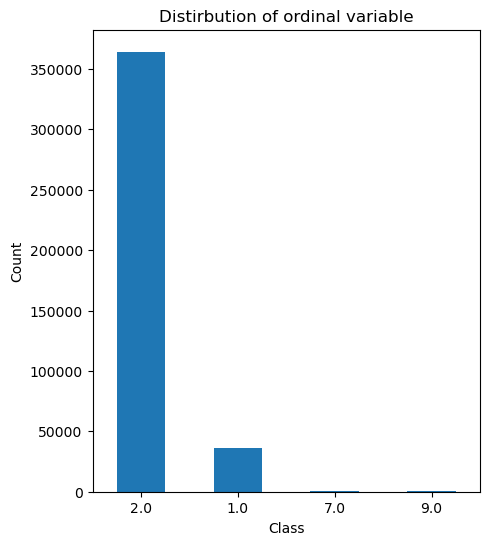

In [71]:
#you had skin cancer?
new2_df['CHCSCNCR'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#you had skin cancer 2 represent no

Text(0, 0.5, 'Count')

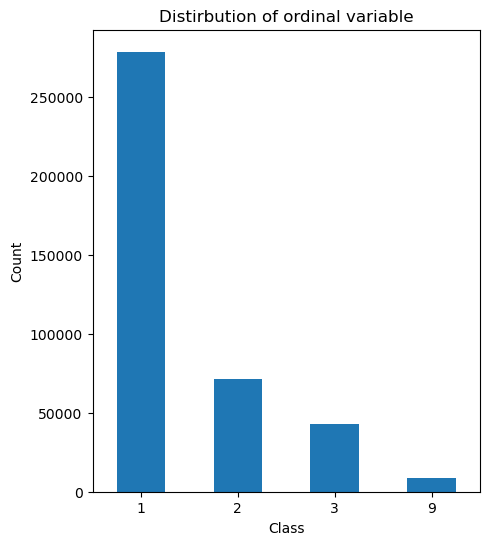

In [72]:
new2_df['_PHYS14D'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#computed physical health status 1 represent zero days when physical health is not good
#2---1-13 days when physical health not good
#3--- 14+ days when physical health not good 
#4 --- Don’t know/Refused/Missing 

Text(0, 0.5, 'Count')

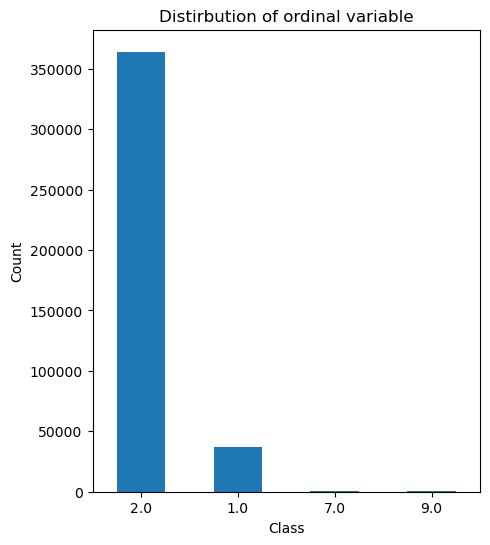

In [73]:
# you had any other types of cancer
new2_df['CHCOCNCR'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")

#you had other type of cancer 2 represent no

Text(0, 0.5, 'Count')

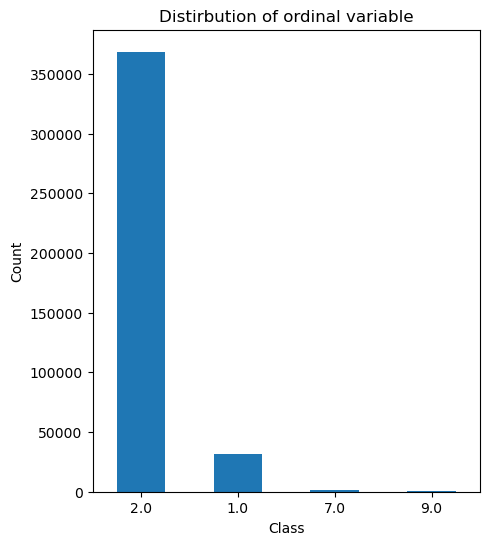

In [74]:
#chronic obstructive pulmonary disease,related to lungs
new2_df['CHCCOPD2'].value_counts().plot(kind='bar',figsize=(5,6),rot=0)
plt.title("Distirbution of ordinal variable")
plt.xlabel("Class")
plt.ylabel("Count")


#you had chronic obstructive pulmonary diseas,emphysema or chronic bronchitis

# Age relationship with respect to heart diseas


<AxesSubplot:xlabel='_AGE_G', ylabel='count'>

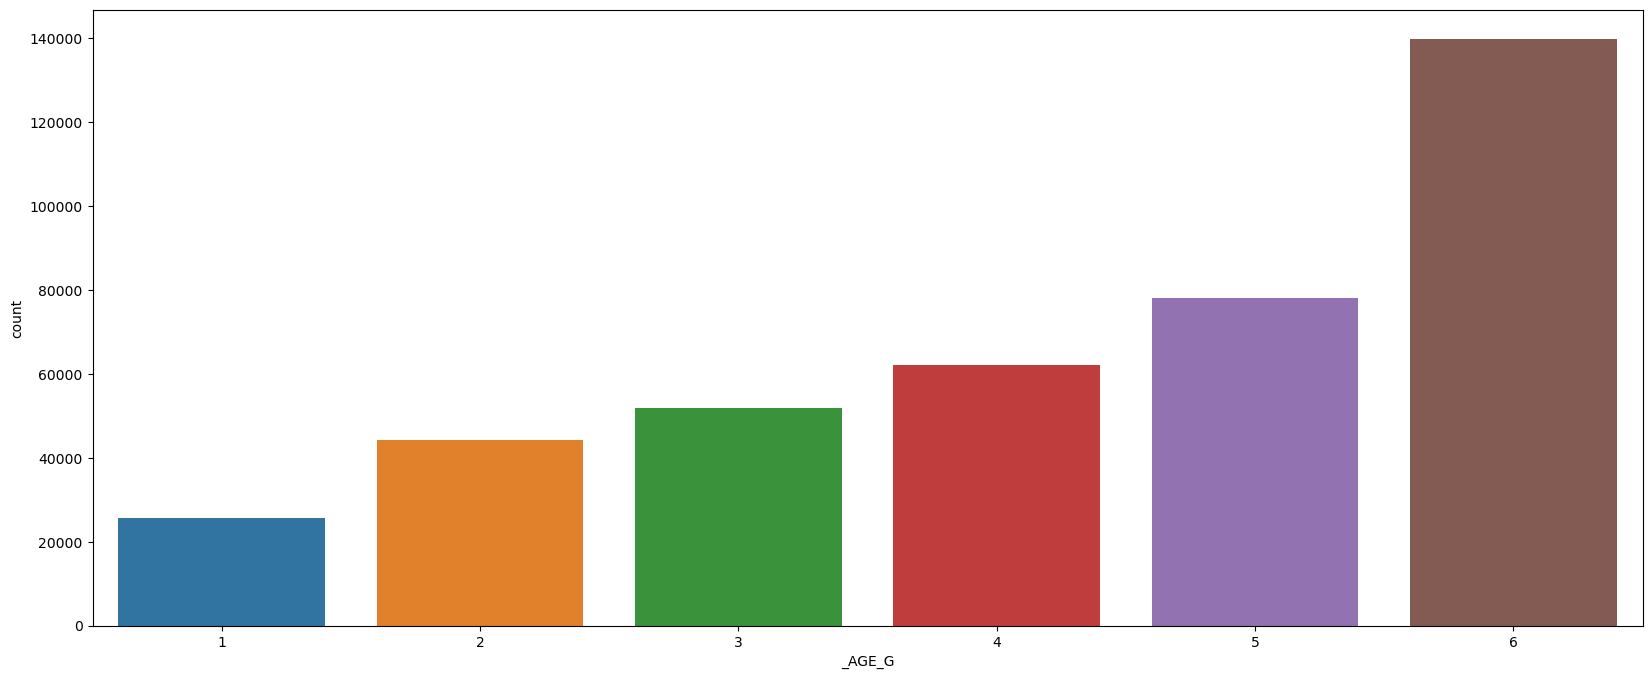

In [75]:
plt.figure(figsize=(20,8))
sns.countplot(x=new2_df['_AGE_G'])

# by EDA able to know that our data is imbalanced so we have 
#technique like oversampling and undersampling

# X and Y split of data


In [76]:
X=new2_df.drop('_MICHD',axis=1)
Y=new2_df['_MICHD']


In [77]:
print(X.shape,Y.shape)

(401958, 20) (401958,)


In [78]:
Yes = new2_df[new2_df['_MICHD']==1]

No = new2_df[new2_df['_MICHD']==0]

# Balance dataset using oversampling

In [79]:
from imblearn.over_sampling import RandomOverSampler
os1 = RandomOverSampler()
X_res,y_res=os1.fit_resample(X, Y)

# Feature selection

In [80]:
#perform chi squre test
#chi_squre test returns two values 
# f_score and p value
# we do feature selectio by various technique chi_squre test is selected becuase we have categorical data
from sklearn.feature_selection import chi2
f_p_values=chi2(X_res,y_res)

In [81]:
f_p_values

(array([ 1179.04529618,  4258.3781705 ,  1333.88448996,  1872.49406388,
        41505.21154538, 56053.90582033,  3813.73372456,  3334.31832055,
        54152.41199591,   364.72592604,  7645.46382843,   292.3773214 ,
          616.67632187,   543.37242056,   918.6481345 , 25988.4229145 ,
          775.86845004,  2265.77397091,  5797.9383643 ,  5569.5309662 ]),
 array([2.18461156e-258, 0.00000000e+000, 4.89462280e-292, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.63357391e-081, 0.00000000e+000, 1.50857415e-065,
        3.95046440e-136, 3.48155868e-120, 8.66934283e-202, 0.00000000e+000,
        9.52346054e-171, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

In [82]:
# more heigher the value of f_score more important feature will be
# lesser the p_value more important feature will be
f_p_values=pd.Series(f_p_values[0])
f_p_values.index=X_res.columns
f_p_values

_BMI5CAT     1179.045296
_SMOKER3     4258.378171
CVDSTRK3     1333.884490
SEXVAR       1872.494064
CVDINFR4    41505.211545
_AGE_G      56053.905820
_IMPRACE     3813.733725
EXERANY2     3334.318321
GENHLTH     54152.411996
ADDEPEV3      364.725926
SLEPTIM1     7645.463828
ASTHMA3       292.377321
_MENT14D      616.676322
CHCKDNY2      543.372421
CHCSCNCR      918.648134
_PHYS14D    25988.422915
CHCOCNCR      775.868450
CHCCOPD2     2265.773971
MARITAL      5797.938364
DIFFWALK     5569.530966
dtype: float64

In [83]:
f_p_values.sort_values(ascending=False)

_AGE_G      56053.905820
GENHLTH     54152.411996
CVDINFR4    41505.211545
_PHYS14D    25988.422915
SLEPTIM1     7645.463828
MARITAL      5797.938364
DIFFWALK     5569.530966
_SMOKER3     4258.378171
_IMPRACE     3813.733725
EXERANY2     3334.318321
CHCCOPD2     2265.773971
SEXVAR       1872.494064
CVDSTRK3     1333.884490
_BMI5CAT     1179.045296
CHCSCNCR      918.648134
CHCOCNCR      775.868450
_MENT14D      616.676322
CHCKDNY2      543.372421
ADDEPEV3      364.725926
ASTHMA3       292.377321
dtype: float64

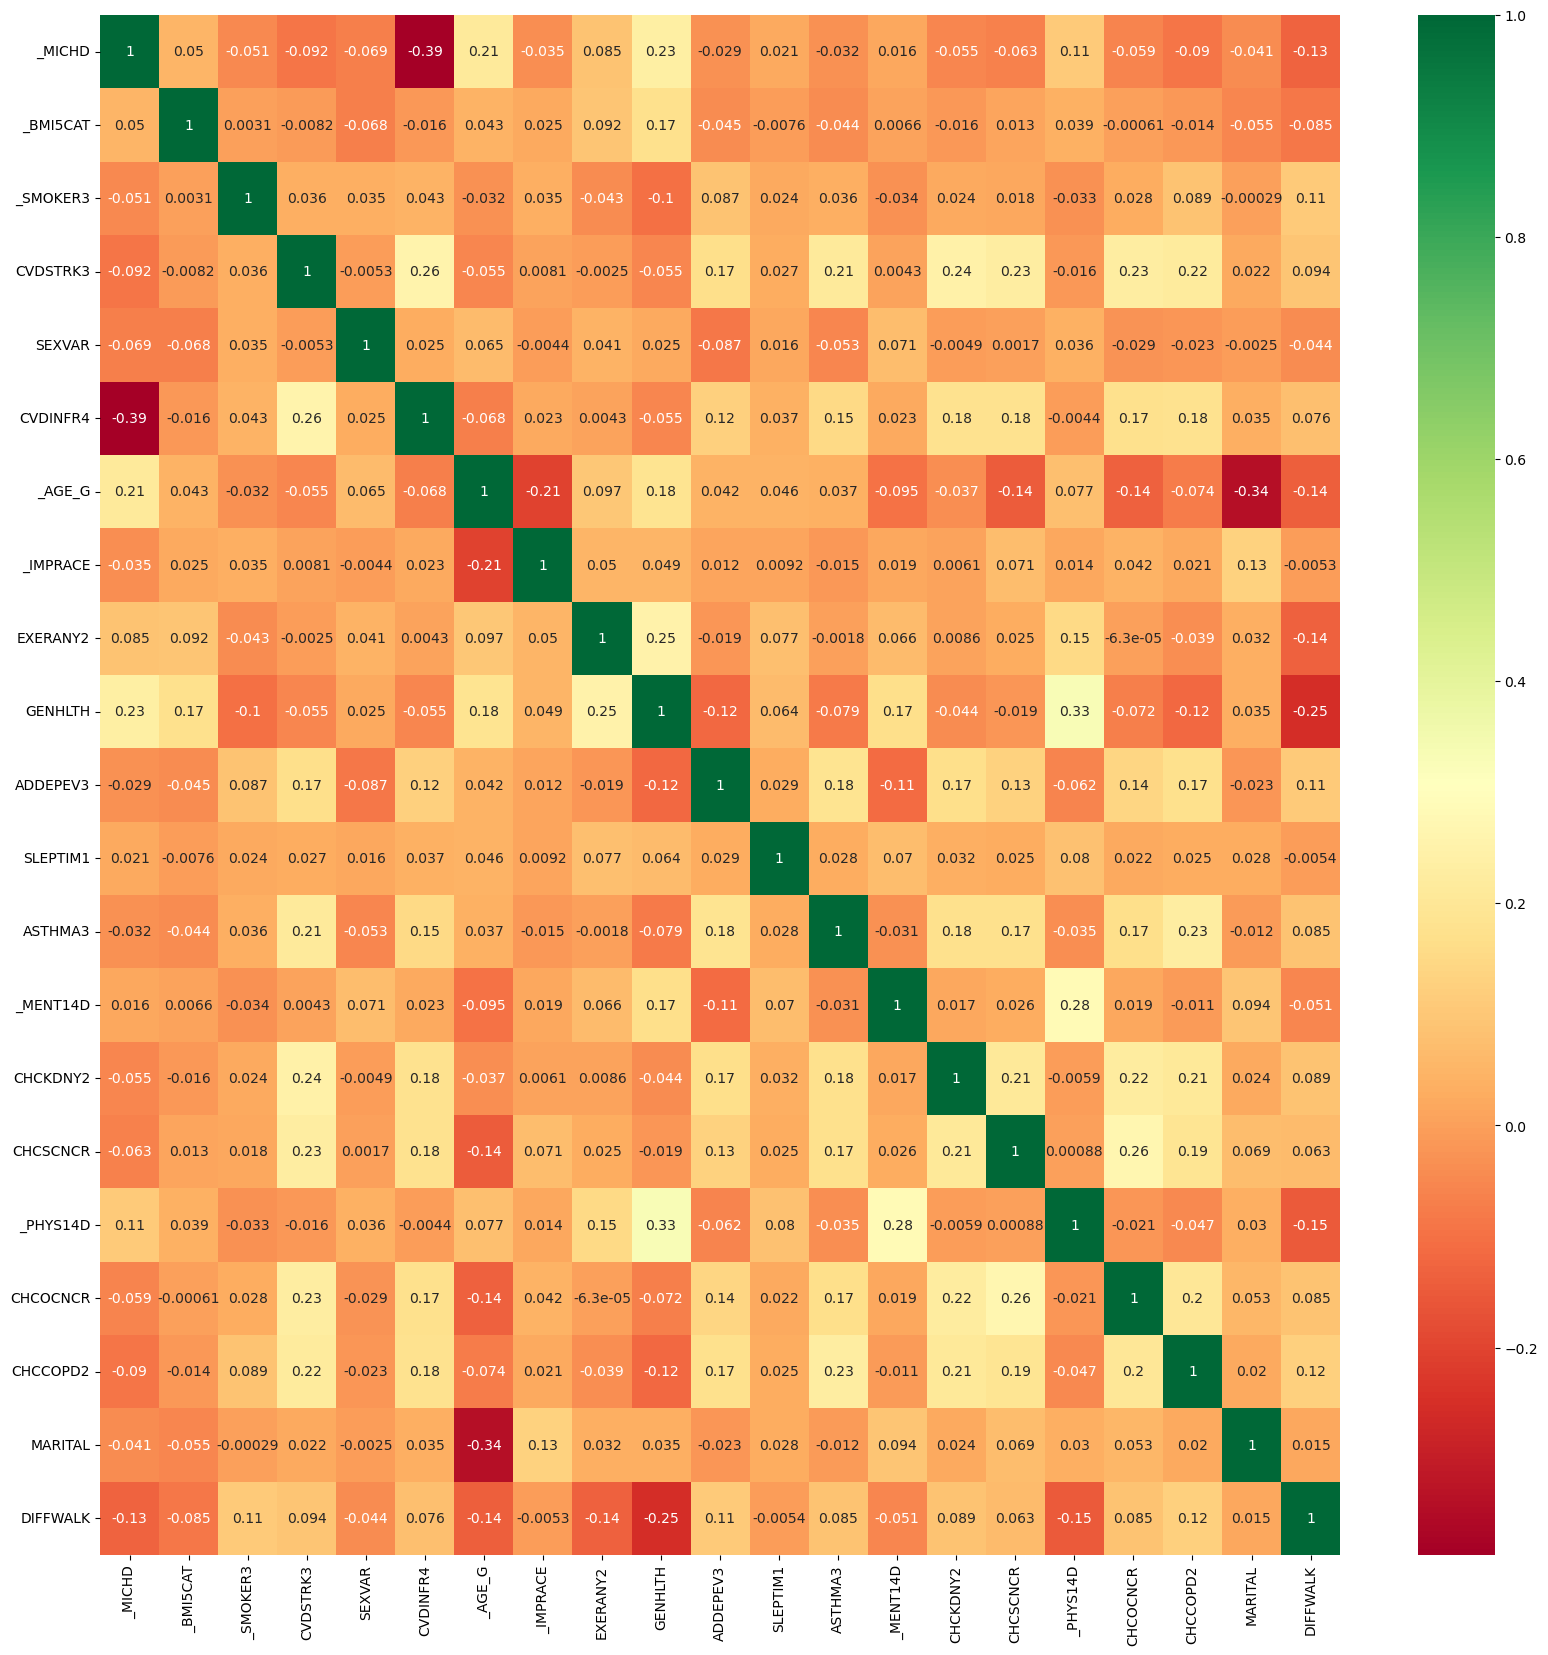

In [84]:
#correlation for each feature in dataset

import seaborn as sns
corrmat=new2_df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(new2_df[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [85]:
#_Age_g column is most important column in dataset 
#age play important role 

In [86]:
print(f_p_values.nlargest(15))

_AGE_G      56053.905820
GENHLTH     54152.411996
CVDINFR4    41505.211545
_PHYS14D    25988.422915
SLEPTIM1     7645.463828
MARITAL      5797.938364
DIFFWALK     5569.530966
_SMOKER3     4258.378171
_IMPRACE     3813.733725
EXERANY2     3334.318321
CHCCOPD2     2265.773971
SEXVAR       1872.494064
CVDSTRK3     1333.884490
_BMI5CAT     1179.045296
CHCSCNCR      918.648134
dtype: float64


#  selecting top 15 columns based on f_score value of chi-squre test

In [87]:
X_res = X_res[['_BMI5CAT','_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'_AGE_G','_IMPRACE','EXERANY2','GENHLTH',
             'CHCKDNY2','_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
X_res.head()

,_BMI5CAT,_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,_AGE_G,_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,2.0,2,1.0,1.0,2.0,2.0
1,3.0,9,2.0,2,2.0,6,2,1.0,3.0,2.0,1,2.0,2.0,3.0,2.0
2,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,1,1.0,2.0,1.0,2.0
3,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,1,2.0,2.0,3.0,2.0


# Train test splitting of data

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.33,random_state=0)

In [89]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((492845, 15), (242745, 15), (492845,), (242745,))

# Logistic Regression

In [90]:
#As our dependend or output variable is categorical
from sklearn import linear_model
logr=linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [107]:
log_pred=logr.predict(X_test)


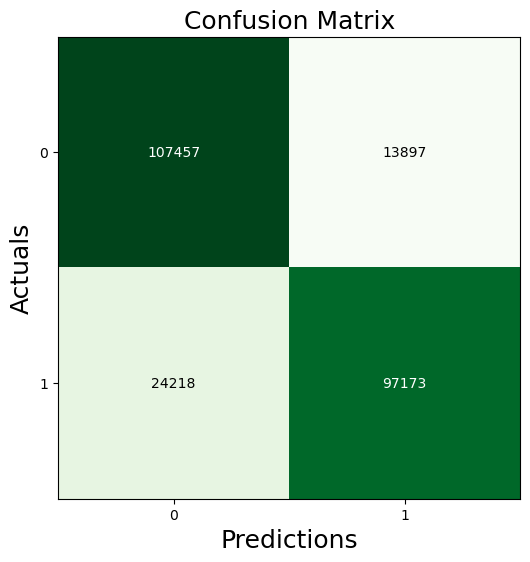

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,log_pred)
from mlxtend.plotting import plot_confusion_matrix
fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(6,6),cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_pred)

0.8429833776184885

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85    121354
         1.0       0.87      0.80      0.84    121391

    accuracy                           0.84    242745
   macro avg       0.85      0.84      0.84    242745
weighted avg       0.85      0.84      0.84    242745



# Descision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [97]:
descision_pred=classifier.predict(X_test)

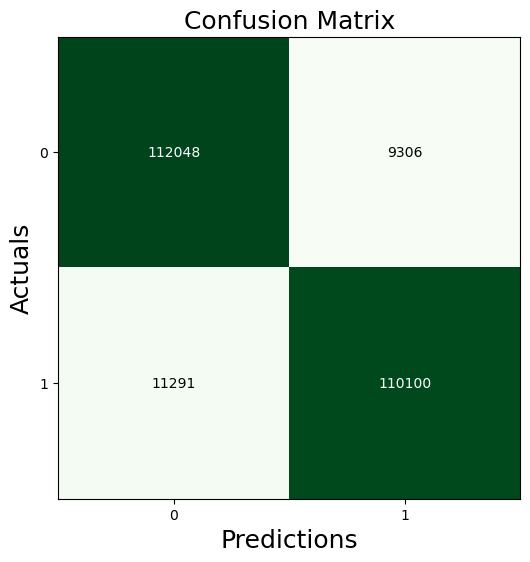

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, descision_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,descision_pred)

0.9151496426290964

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,descision_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92    121354
         1.0       0.92      0.91      0.91    121391

    accuracy                           0.92    242745
   macro avg       0.92      0.92      0.92    242745
weighted avg       0.92      0.92      0.92    242745



# Random Forest


In [101]:
from sklearn.ensemble import RandomForestClassifier
random_classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
random_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [102]:
random_pred=random_classifier.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,random_pred)

0.9215061072318689

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92    121354
         1.0       0.93      0.91      0.92    121391

    accuracy                           0.92    242745
   macro avg       0.92      0.92      0.92    242745
weighted avg       0.92      0.92      0.92    242745



# Naive Bayes

In [108]:
# navie based algorithm
from sklearn.naive_bayes import GaussianNB
NB_classifier=GaussianNB()
NB_classifier.fit(X_train,y_train)

GaussianNB()

In [109]:
NB_pred=classifier.predict(X_test)

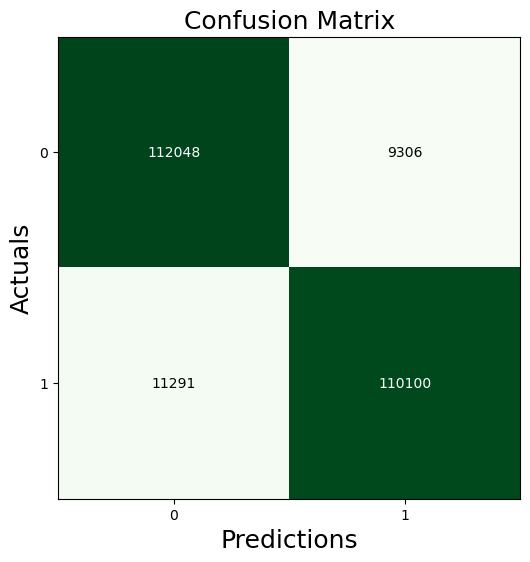

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, NB_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,NB_pred)

0.9151496426290964

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92    121354
         1.0       0.92      0.91      0.91    121391

    accuracy                           0.92    242745
   macro avg       0.92      0.92      0.92    242745
weighted avg       0.92      0.92      0.92    242745



#  XGBClassifier


In [113]:
XGB_classifier= XGBClassifier()  
XGB_classifier.fit(X_train , y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [114]:
XGB_pred=XGB_classifier.predict(X_test)

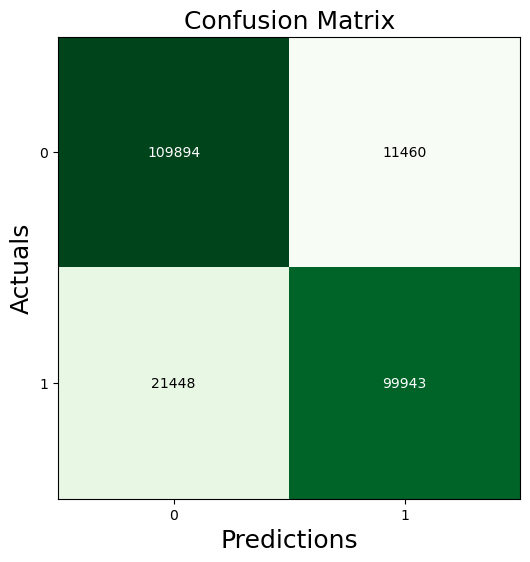

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, XGB_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,XGB_pred)

0.8644338709345197

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87    121354
         1.0       0.90      0.82      0.86    121391

    accuracy                           0.86    242745
   macro avg       0.87      0.86      0.86    242745
weighted avg       0.87      0.86      0.86    242745



In [118]:
import pickle 
with open('C:/Users/DIGVIJAY/XGB.pkl','wb') as f:
    pickle.dump(XGB_classifier,f)
    

In [119]:
import pickle
with open("C:/Users/DIGVIJAY/Downloads/pickle_folder/random_forest_model.pkl",'wb') as f:
     pickle.dump(random_classifier,f)
    # rest of your code


In [ ]:
with open("C:/Users/DIGVIJAY/Downloads/pickle_folder/random_forest_model.pkl",'rb') as f:
    new_model=pickle.load(f)